In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import datetime

In [3]:
tt = pd.read_csv("titanic_test.csv")
tt = tt.drop("Name", axis=1)
target = pd.read_csv("gender_submission.csv")
tt["target"] = target["Survived"]
tt

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


In [22]:
tt["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [4]:
tt = tt.drop("Cabin", axis=1)
for label, content in tt.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            tt[label+"_is_missing"] = pd.isnull(content)
            tt[label] = content.fillna(content.median())
tt

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,target,Age_is_missing,Fare_is_missing
0,892,3,male,34.5,0,0,330911,7.8292,Q,0,False,False
1,893,3,female,47.0,1,0,363272,7.0000,S,1,False,False
2,894,2,male,62.0,0,0,240276,9.6875,Q,0,False,False
3,895,3,male,27.0,0,0,315154,8.6625,S,0,False,False
4,896,3,female,22.0,1,1,3101298,12.2875,S,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,A.5. 3236,8.0500,S,0,True,False
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C,1,False,False
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,False,False
416,1308,3,male,27.0,0,0,359309,8.0500,S,0,True,False


In [5]:
ttd = pd.get_dummies(tt, drop_first=True, columns=["Sex", "Ticket", "Embarked"])

In [6]:
for column in ttd.columns:
    if ttd[column].dtype == "bool":
        ttd[column] = ttd[column].astype("int32")
ttd

,PassengerId,Pclass,Age,SibSp,Parch,Fare,target,Age_is_missing,Fare_is_missing,Sex_male,...,Ticket_STON/O 2. 3101291,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
416,1308,3,27.0,0,0,8.0500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 374 entries, PassengerId to Embarked_S
dtypes: float64(2), int32(367), int64(5)
memory usage: 622.2 KB


In [8]:
tt

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,target,Age_is_missing,Fare_is_missing
0,892,3,male,34.5,0,0,330911,7.8292,Q,0,False,False
1,893,3,female,47.0,1,0,363272,7.0000,S,1,False,False
2,894,2,male,62.0,0,0,240276,9.6875,Q,0,False,False
3,895,3,male,27.0,0,0,315154,8.6625,S,0,False,False
4,896,3,female,22.0,1,1,3101298,12.2875,S,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,A.5. 3236,8.0500,S,0,True,False
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C,1,False,False
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,False,False
416,1308,3,male,27.0,0,0,359309,8.0500,S,0,True,False


In [9]:
tt.isna().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
target             0
Age_is_missing     0
Fare_is_missing    0
dtype: int64

In [10]:
tt_test = pd.read_csv("titanic_test.csv")
tt_test = tt_test.drop("Name", axis=1)
tt_test = tt_test.drop("Cabin", axis=1)
for label, content in tt_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            tt_test[label+"_is_missing"] = pd.isnull(content)
            tt_test[label] = content.fillna(content.median())
tt_test = pd.get_dummies(tt_test, drop_first=True, columns=["Sex", "Ticket", "Embarked"])
for column in tt_test.columns:
    if tt_test[column].dtype == "bool":
        tt_test[column] = tt_test[column].astype("int32")

In [11]:
tt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 373 entries, PassengerId to Embarked_S
dtypes: float64(2), int32(367), int64(4)
memory usage: 619.0 KB


In [12]:
ttd.shape, tt_test.shape

((418, 374), (418, 373))

In [13]:
X = ttd.drop("target", axis=1)
y = ttd["target"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
len(X_train)

334

In [14]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 374 entries, PassengerId to Embarked_S
dtypes: float64(2), int32(367), int64(5)
memory usage: 622.2 KB


In [15]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

1.0

In [119]:
cvs = cross_val_score(estimator=model, X=X, y=y, cv=5, scoring="accuracy")
cvs

array([1., 1., 1., 1., 1.])

In [120]:
pred = model.predict(tt_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
final = pd.DataFrame()
final["PassengerId"] = tt_test["PassengerId"]
final["Survived"] = pred
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
final.to_csv("Titanic_Predictions.csv", index=False)

In [126]:
fn = pd.read_csv("Titanic_Predictions.csv")
fn

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [129]:
model2 = LogisticRegression(n_jobs=-1, random_state=42)
model2.fit(X_train, y_train)
model2.score(X_valid, y_valid)
pred2 = model2.predict(tt_test)
final2 = pd.DataFrame()
final2["PassengerId"] = tt_test["PassengerId"]
final2["Survived"] = pred2
final2.to_csv("Titanic_Predictions_Logistic_Regression.csv", index=False)

In [134]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
pred3 = model3.predict(tt_test)
final3 = pd.DataFrame()
final3["PassengerId"] = tt_test["PassengerId"]
final3["Survived"] = pred3
final3.to_csv("Titanic_Predictions_KNeighborsClassifier.csv", index=False)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [17]:
rs_grid= {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs =RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions = rs_grid,
                       n_iter=100,
                cv=5,
                verbose = True)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [18]:
rs.best_params_

{'n_estimators': 160,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None}

In [19]:
model4 = RandomForestClassifier(n_estimators= 160,
 min_samples_split= 10,
 min_samples_leaf =1,
 max_depth =None)
model4.fit(X_train, y_train)
cross_val_score(estimator=model4, X=X, y=y, cv=5, scoring="accuracy").mean()

1.0

In [20]:
pred4 = model4.predict(tt_test)
final4 = pd.DataFrame()
final4["PassengerId"] = tt_test["PassengerId"]
final4["Survived"] = pred4
final4.to_csv("Titanic_Predictions_rfc_improved.csv", index=False)

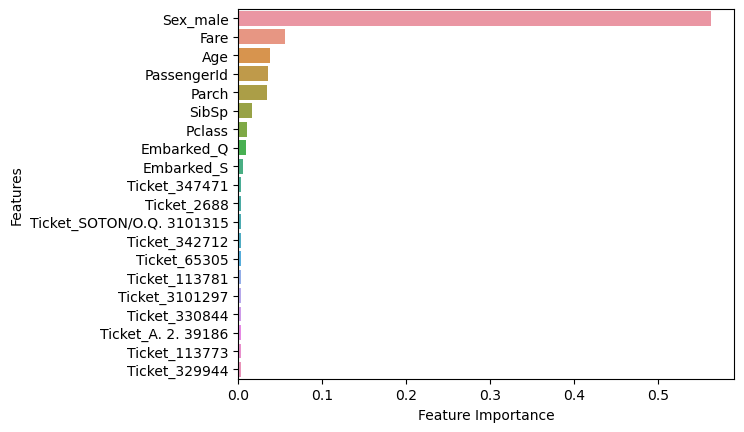

In [23]:
import seaborn as sns

def plot_features(columns, feature_importance):
    graph = pd.DataFrame({"Features" : columns, "Feature Importance" : feature_importance}).sort_values("Feature Importance", ascending = False).reset_index(drop=True)
    sns.barplot(x = "Feature Importance", y = "Features", data = graph[:20], orient="h" )
plot_features(X_train.columns, model4.feature_importances_)